### Overview of the sections: <br>
1) Data Understanding <br>
2) EDA <br>
3) Modelling for prediction task: <br>
- Ridge, Lasso Regression <br>
- Random Forest <br>
- Neural Network <br>

4) Classification task: <br>
- Data labelling <br>
- EDA <br>
- Neural Network <br>

In [1]:
### Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

from datetime import datetime

from scipy import stats
from scipy.stats import norm

import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings("ignore")

## 1/  Data Understanding

In [2]:
#Load data 
data= pd.read_csv('final_data_cleaned.csv')
data.head()

,GEO_ID,COUNTY,STATE,POPULATION,AGE15_19,AGE20_24,AGE25_29,AGE30_34,AGE55_59,AGE60_64,...,UNEMP_65-74,UNEMP_OVER75,PERCENT WITH PRIVATE HEALTH INSURANCE,PERCENT NO PRIVATE HEALTH INSURANCE,PERCENT WITH PUBLIC HEALTH INSURANCE,PERCENT NO PUBLIC HEALTH INSURANCE,PERCENT MISSING HEALTH,LAND AREA(SQMI),INFECTION RATE,POP DENSITY
0,0500000US01001,Autauga County,Alabama,55200.0,7.0,6.0,6.6,6.2,7.5,4.9,...,1.5,0.0,64.150362,34.150362,37.731884,60.568841,26.865672,598.73,0.034420,92.195146
1,0500000US01003,Baldwin County,Alabama,208107.0,6.1,5.2,5.7,5.5,6.9,7.1,...,3.2,2.6,72.480022,28.537243,35.510098,65.507167,26.865672,1737.68,0.031714,119.761406
2,0500000US01005,Barbour County,Alabama,25782.0,5.6,6.4,7.2,7.0,6.4,6.4,...,3.0,9.2,40.745481,45.857575,49.169964,37.433093,26.865672,891.30,0.034908,28.926287
3,0500000US01007,Bibb County,Alabama,22527.0,6.7,6.6,6.9,6.7,6.6,5.4,...,4.5,0.0,55.440139,35.495184,39.836640,51.098682,26.865672,624.10,0.057709,36.095177
4,0500000US01009,Blount County,Alabama,57645.0,6.4,5.5,5.9,5.9,6.8,6.3,...,2.4,0.0,66.657993,33.015873,36.308440,63.365426,26.865672,646.77,0.020817,89.127511


In [410]:
#Check numerical columns
numfeat = list(data.select_dtypes(exclude='object').columns)
print("There are {} numerical features".format(len(numfeat)))
print("  ")
data[numfeat].info()

There are 99 numerical features
  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 99 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   POPULATION                                          3147 non-null   float64
 1   AGE15_19                                            3147 non-null   float64
 2   AGE20_24                                            3147 non-null   float64
 3   AGE25_29                                            3147 non-null   float64
 4   AGE30_34                                            3147 non-null   float64
 5   AGE55_59                                            3147 non-null   float64
 6   AGE60_64                                            3147 non-null   float64
 7   TOTAL_MALE                                          3147 non-null   float64
 8   TOTAL_FEMALE                               

In [411]:
#Check categorical columns
catfeat = list(data.select_dtypes(include='object').columns)
print("There are {} categorical features".format(len(catfeat)))
print("  ")
data[catfeat].info()

There are 3 categorical features
  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GEO_ID  3147 non-null   object
 1   COUNTY  3147 non-null   object
 2   STATE   3147 non-null   object
dtypes: object(3)
memory usage: 73.9+ KB


In [412]:
#Get summary of data
def getDfSummary(input_data):
    # Turn input into a dataframe
    data = pd.DataFrame(data=input_data)
    
    # Create a new data frame for the results
    index_names = list(input_data.columns)
    col_names = ['number_nan','percent_missing','number_distinct','mean','max','min','std','25%','50%','75%']
    df_summary = pd.DataFrame(columns = col_names,index = index_names)
        
    # Count the missing not-a-number values
    df_summary['number_nan'] = list(input_data.isna().sum())
    df_summary['percent_missing'] = list(input_data.isna().sum()/input_data.shape[0])
    
    # Count the number of distinct values for each variable
    df_summary['number_distinct'] = list(input_data.nunique())
    
    # Output the summary information of the input data
    data_describe = input_data.describe()
    summary_features = ['mean','max','min','std','25%','50%','75%']
    for i in summary_features:
        df_summary[i] = data_describe.loc[i]
    # Return the results  
    return df_summary

getDfSummary(data)

,number_nan,percent_missing,number_distinct,mean,max,min,std,25%,50%,75%
GEO_ID,0,0.0,3142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COUNTY,0,0.0,1877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATE,0,0.0,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POPULATION,0,0.0,3084,103045.173499,1.009805e+07,75.000000,330172.777224,10948.000000,25771.000000,67443.000000
AGE15_19,0,0.0,117,6.465396,2.640000e+01,0.000000,1.434723,5.700000,6.400000,7.000000
...,...,...,...,...,...,...,...,...,...,...
PERCENT NO PUBLIC HEALTH INSURANCE,0,0.0,1847,61.155339,8.901733e+01,27.285728,10.519259,54.583808,61.845514,70.593231
PERCENT MISSING HEALTH,0,0.0,42,41.213616,8.490566e+01,0.000000,22.244989,22.891566,43.902439,52.000000
LAND AREA(SQMI),0,0.0,3107,1151.639002,1.524105e+05,1.990000,3754.582472,436.470000,634.660000,942.385000
INFECTION RATE,0,0.0,2598,0.059845,6.022003e+00,0.000000,0.169492,0.009594,0.025958,0.055816


In [413]:
#Check how many unique values each categorical variables has.
for i in catfeat:
    nuniques = data[i].nunique()
    print(i+ ': ' + str(nuniques))

GEO_ID: 3142
COUNTY: 1877
STATE: 51


**Note:**
There is no missing values.
There are 4 numerical features (including our target variable) and 7 categorical features.

## 2/ EDA

### Target Variable

Our target variable is flat resale price. 

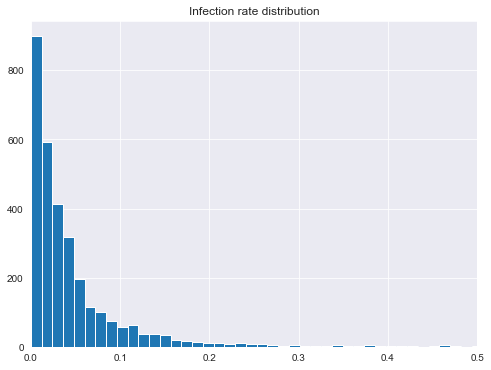

In [414]:
y = data['INFECTION RATE']
plt.figure(figsize=(8,6))
#sns.distplot(y)
plt.hist(y,bins=500)
plt.xlim(0,0.5)
title = plt.title("Infection rate distribution")

(0, 0.2)

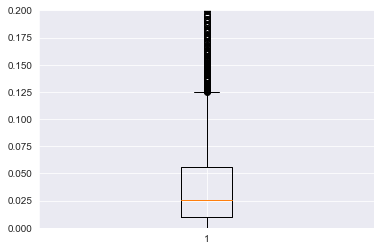

In [415]:
plt.boxplot(y)
plt.ylim(0,0.2)

In [418]:
np.median(y) #with  0.0 cases

0.02595829367482911

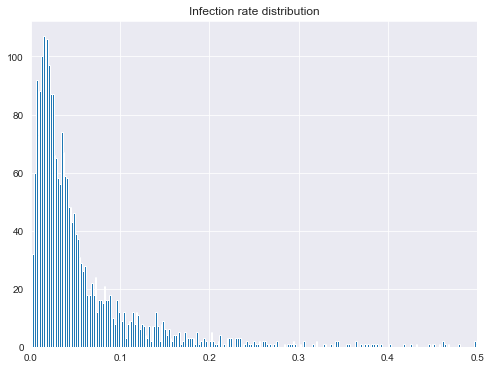

In [419]:
y2 = dtrain['INFECTION RATE']
plt.figure(figsize=(8,6))
#sns.distplot(y)
plt.hist(y2,bins=500)
plt.xlim(0,0.5)
title = plt.title("Infection rate distribution")

In [420]:
def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    #plt.xlim(0,1)
    plt.ylim(0,1)
    

    plt.tight_layout()

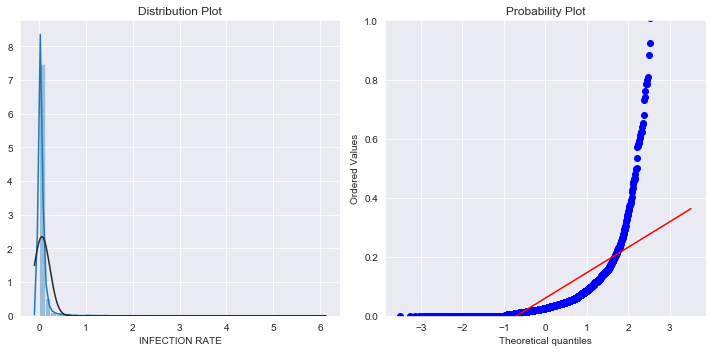

In [421]:
normality_plot(y)

**Note:** AFter the log transformation, we can clearly see a linear relationship between log(resale_price) and log(floor_area_sqm).

In [423]:
#But before doing further feature engineering or modelling, we first check the correlations between these variables.
corr = data.corr()

In [424]:
corr[corr['INFECTION RATE']>=0.2]['INFECTION RATE']

INCOME_PERCAPITA                             0.211347
PUBLIC TRANSPORTATION (EXCLUDING TAXICAB)    0.411712
BACHELOR'S DEGREE                            0.226012
GRADUATE OR PROFESSIONAL DEGREE              0.291855
$65,000 TO $74,999                           0.220219
$75,000 OR MORE                              0.274970
INFECTION RATE                               1.000000
POP DENSITY                                  0.223890
Name: INFECTION RATE, dtype: float64

## 3/ Modelling

In [3]:
#Create training, validation and test set based on year
cols = data.columns.tolist()
usecols = [i for i in cols if i not in ['POPULATION','GEO_ID','STATE','COUNTY','INFECTION RATE']]
len(usecols)

97

In [4]:
dtrain = data[data['INFECTION RATE']!= 0]
dexplore = data[data['INFECTION RATE']== 0]

dtrain.shape, dexplore.shape

((2618, 102), (529, 102))

In [7]:
y_explore = dexplore['INFECTION RATE']
X_explore = dexplore[usecols]

y = dtrain['INFECTION RATE']
X= dtrain[usecols]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)
X_train.shape, X_test.shape, X_explore.shape

((1570, 97), (1048, 97), (529, 97))

In [8]:
#Define a function that return the RMSLE (root mean square log error)
#https://scikit-learn.org/stable/modules/model_evaluation.html
n_folds = 5
def getMSE(model):
    """
    Return the average RMSLE over all folds of training data.
    """
    # Set KFold to shuffle data before the split
    kf = KFold(n_folds, shuffle=True, random_state=42)

    # Get RMSLE score
    mse = np.sqrt(-cross_val_score(
        model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))


    return mse.mean()

### Ridge Regression

Best lambda: 1e-05
MSE: 0.3513756982562748


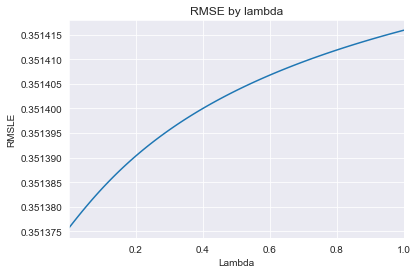

In [12]:
lambda_list = list(np.linspace(1e-5,1, 100))

mse_ridge = [getMSE(Ridge(alpha=lambda_)) for lambda_ in lambda_list]
mse_ridge = pd.Series(mse_ridge, index=lambda_list)

mse_ridge.plot(title="RMSE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", mse_ridge.idxmin())
print("MSE:", mse_ridge.min())

In [13]:
ridge = Ridge(alpha = 1e-05)

### Lasso Regression

In [94]:
lambda_list = list(np.linspace(0.001,1.0, 100))
rmsle_lasso = [getRMSLE(Lasso(alpha=lambda_, max_iter=100000)) for lambda_ in lambda_list]
rmsle_lasso = pd.Series(rmsle_lasso, index=lambda_list)

rmsle_lasso.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_lasso.idxmin())
print("RMSLE:", rmsle_lasso.min())

**Note:** Lasso does not converge even after 1e5 iterations. I'll proceed with Ridge.
Let's look at the coefficients output by Ridge.

### Ridge performance on validation set

In [17]:
def get_val_mse(X_val, y_val, model):
    """
    Return the RMSLE of validation or test data.
    """
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_pred,y_val)
    return mse 

In [18]:
#Compare R_squared
ridge.fit(X_train,y_train)
mse_val_ridge = get_val_mse(X_test, y_test, ridge)

print('MSE of Ridge:', mse_val_ridge)
print('R_squared of Ridge:', ridge.score(X_test,y_test))

MSE of Ridge: 0.031488347381475566
R_squared of Ridge: -0.8374487732754647


In [433]:
#Check the coefficients output by Ridge. Please see the conclusion for further interpretation.
feature = X_train.columns.tolist()
coef_ridge = ridge.coef_
stats = pd.DataFrame(feature, coef_ridge).reset_index()
stats.columns = ['coef','feature']
stats[stats['coef'] != 0].sort_values('coef',ascending=False).head(20)

,coef,feature
19,0.031989,"WORKERS PER CAR, TRUCK, OR VAN"
77,0.029262,EMP_65-74
74,0.028461,EMP_45-54
85,0.021596,UNEMP_45-54
32,0.017892,25 TO 29 MINUTES
36,0.015126,60 OR MORE MINUTES
75,0.013882,EMP_55-59
35,0.013156,45 TO 59 MINUTES
33,0.011889,30 TO 34 MINUTES
29,0.011574,10 TO 14 MINUTES


### Random Forest Regression

In [434]:
regressor = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100 , num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 33, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [int(i) for i in np.logspace(1,2.5,5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(i/2) for i in np.logspace(1,2.5,5)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 55, 61, 66, 72, 77, 83, 88, 94, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 4, 8, 11, 15, 18, 22, 25, 29, 33], 'min_samples_split': [10, 23, 56, 133, 316], 'min_samples_leaf': [5, 11, 28, 66, 158], 'bootstrap': [True, False]}


In [437]:
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [439]:
RF_regressor

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=23, min_weight_fraction_leaf=0.0,
                      n_estimators=77, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [440]:
RF_regressor = rf_random.best_estimator_
#getRMSLE(RF_regressor)

In [441]:
RF_regressor.fit(X_train,y_train)
print('RMSE of Random Forest Regressor:', get_val_rmse(X_test, y_test, RF_regressor))
print('R_squared of RF_regressor:', RF_regressor.score(X_test,y_test))

RMSE of Random Forest Regressor: 0.14587353690771054
R_squared of RF_regressor: 0.08258298711313217


In [442]:
0.14587353690771054**2

0.02127908876996519

### Fix outliers (cap those above 1.0 to be 1.0)

In [69]:
dtrain2 = dtrain
above_1 = dtrain2[dtrain2['INFECTION RATE'] > 1.0]['GEO_ID']
len(above_1) # 18
dtrain2.loc[dtrain2.GEO_ID.isin(above_1), 'INFECTION RATE'] =  1.0

In [73]:
y = dtrain2['INFECTION RATE']
X= dtrain2[usecols]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape

((1570, 97), (1048, 97))

In [75]:
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [78]:
RF_regressor = rf_random.best_estimator_
getRMSE(RF_regressor)

0.10201493601889718

In [406]:
0.10201493601889718**2

0.010407047170939685

In [81]:
RF_regressor.fit(X_train,y_train)
print('RMSE of Random Forest Regressor:', get_val_rmse(X_test, y_test, RF_regressor))
print('R_squared of RF_regressor:', RF_regressor.score(X_test,y_test))

RMSE of Random Forest Regressor: 0.10375459584164215
R_squared of RF_regressor: 0.2401574891933168


In [83]:
rmse = get_val_rmse(X_test, y_test, RF_regressor)

In [89]:
(0.10510372959822419)**2

0.011046793975456626

## Neural Network

### Attempt 1

In [37]:
# !pip install keras

In [38]:
# !pip install tensorflow

In [120]:
import tensorflow as tf

In [95]:
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [448]:
tf.keras.backend.clear_session()

In [449]:
#Cap infection rate at 1.0
NN_model_base = Sequential()

# The Input Layer :
NN_model_base.add(Dense(50, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
# The Hidden Layers :
NN_model_base.add(Dense(50, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model_base.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
opt = keras.optimizers.Adam(learning_rate=0.1)
NN_model_base.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
NN_model_base.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                4900      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 7,501
Trainable params: 7,501
Non-trainable params: 0
_________________________________________________________________


In [450]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

NN_model_base.fit(X_train, y_train, epochs=400, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 1256 samples, validate on 314 samples
Epoch 1/400
1256/1256 [==============================] - 0s 99us/step - loss: 871617016.4725 - mean_squared_error: 871617088.0000 - val_loss: 0.0766 - val_mean_squared_error: 0.0766

Epoch 00001: val_loss improved from inf to 0.07663, saving model to Weights-001--0.07663.hdf5
Epoch 2/400
1256/1256 [==============================] - 0s 38us/step - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.0285 - val_mean_squared_error: 0.0285

Epoch 00002: val_loss improved from 0.07663 to 0.02851, saving model to Weights-002--0.02851.hdf5
Epoch 3/400
1256/1256 [==============================] - 0s 36us/step - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.0212 - val_mean_squared_error: 0.0212

Epoch 00003: val_loss improved from 0.02851 to 0.02119, saving model to Weights-003--0.02119.hdf5
Epoch 4/400
1256/1256 [==============================] - 0s 33us/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0210 - val_mean_sq

1256/1256 [==============================] - 0s 33us/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0212 - val_mean_squared_error: 0.0212

Epoch 00037: val_loss did not improve from 0.02093
Epoch 38/400
1256/1256 [==============================] - 0s 30us/step - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.0217 - val_mean_squared_error: 0.0217

Epoch 00038: val_loss did not improve from 0.02093
Epoch 39/400
1256/1256 [==============================] - 0s 32us/step - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.0219 - val_mean_squared_error: 0.0219

Epoch 00039: val_loss did not improve from 0.02093
Epoch 40/400
1256/1256 [==============================] - 0s 34us/step - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0224 - val_mean_squared_error: 0.0224

Epoch 00040: val_loss did not improve from 0.02093
Epoch 41/400
1256/1256 [==============================] - 0s 31us/step - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.0215 - v

1256/1256 [==============================] - 0s 31us/step - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.0219 - val_mean_squared_error: 0.0219

Epoch 00111: val_loss did not improve from 0.02093
Epoch 112/400
1256/1256 [==============================] - 0s 29us/step - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.0217 - val_mean_squared_error: 0.0217

Epoch 00112: val_loss did not improve from 0.02093
Epoch 113/400
1256/1256 [==============================] - 0s 33us/step - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0286 - val_mean_squared_error: 0.0286

Epoch 00113: val_loss did not improve from 0.02093
Epoch 114/400
1256/1256 [==============================] - 0s 29us/step - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.0228 - val_mean_squared_error: 0.0228

Epoch 00114: val_loss did not improve from 0.02093
Epoch 115/400
1256/1256 [==============================] - 0s 29us/step - loss: 0.0510 - mean_squared_error: 0.0510 - val_loss: 0.0210

1256/1256 [==============================] - 0s 29us/step - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.0214 - val_mean_squared_error: 0.0214

Epoch 00185: val_loss did not improve from 0.02093
Epoch 186/400
1256/1256 [==============================] - 0s 31us/step - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.0252 - val_mean_squared_error: 0.0252

Epoch 00186: val_loss did not improve from 0.02093
Epoch 187/400
1256/1256 [==============================] - 0s 30us/step - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.0249 - val_mean_squared_error: 0.0249

Epoch 00187: val_loss did not improve from 0.02093
Epoch 188/400
1256/1256 [==============================] - 0s 33us/step - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.0391 - val_mean_squared_error: 0.0391

Epoch 00188: val_loss did not improve from 0.02093
Epoch 189/400
1256/1256 [==============================] - 0s 34us/step - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.0219

1256/1256 [==============================] - 0s 32us/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0221 - val_mean_squared_error: 0.0221

Epoch 00259: val_loss did not improve from 0.02093
Epoch 260/400
1256/1256 [==============================] - 0s 31us/step - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.0258 - val_mean_squared_error: 0.0258

Epoch 00260: val_loss did not improve from 0.02093
Epoch 261/400
1256/1256 [==============================] - 0s 31us/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0238 - val_mean_squared_error: 0.0238

Epoch 00261: val_loss did not improve from 0.02093
Epoch 262/400
1256/1256 [==============================] - 0s 31us/step - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.0238 - val_mean_squared_error: 0.0238

Epoch 00262: val_loss did not improve from 0.02093
Epoch 263/400
1256/1256 [==============================] - 0s 33us/step - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0217

1256/1256 [==============================] - 0s 32us/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0293 - val_mean_squared_error: 0.0293

Epoch 00333: val_loss did not improve from 0.02093
Epoch 334/400
1256/1256 [==============================] - 0s 30us/step - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.0209 - val_mean_squared_error: 0.0209

Epoch 00334: val_loss did not improve from 0.02093
Epoch 335/400
1256/1256 [==============================] - 0s 31us/step - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.0218 - val_mean_squared_error: 0.0218

Epoch 00335: val_loss did not improve from 0.02093
Epoch 336/400
1256/1256 [==============================] - 0s 31us/step - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0248 - val_mean_squared_error: 0.0248

Epoch 00336: val_loss did not improve from 0.02093
Epoch 337/400
1256/1256 [==============================] - 0s 32us/step - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0249

In [451]:
weights_file = 'Weights-004--0.02099.hdf5' # choose the best checkpoint 
NN_model_base.load_weights(weights_file) # load it
NN_model_base.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])


In [55]:
X_train.shape, y_train.shape

((1570, 97), (1570,))

In [445]:
def nn_val_mse(x_vali, y_vali, model):
    """
    Return the RMSLE of validation or test data.
    """
    y_pred = model.predict(x_vali)
    y_pred = y_pred.reshape(-1)
    mse = mean_squared_error(y_vali,y_pred)
 
    y_pred = y_pred.reshape(-1)
    val_diff= (y_pred - y_vali)/y_vali
    return mse, val_diff

mse, val_diff = nn_val_mse(X_valtest, y_valtest, NN_model_base)
mse

0.013995119781208782

### Attempt 2

In [12]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               12544     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 177,409
Trainable params: 177,409
Non-trainable params: 0
_________________________________________________________________


In [13]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [14]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 1256 samples, validate on 314 samples
Epoch 1/500
1256/1256 [==============================] - 0s 393us/step - loss: 2935440.5157 - mean_squared_error: 2935440.5000 - val_loss: 18175.9300 - val_mean_squared_error: 18175.9297

Epoch 00001: val_loss improved from inf to 18175.92997, saving model to Weights-001--18175.92997.hdf5
Epoch 2/500
1256/1256 [==============================] - 0s 123us/step - loss: 8288.0077 - mean_squared_error: 8288.0078 - val_loss: 7317.5656 - val_mean_squared_error: 7317.5654

Epoch 00002: val_loss improved from 18175.92997 to 7317.56559, saving model to Weights-002--7317.56559.hdf5
Epoch 3/500
1256/1256 [==============================] - 0s 139us/step - loss: 7639.0800 - mean_squared_error: 7639.0796 - val_loss: 1271.6839 - val_mean_squared_error: 1271.6838

Epoch 00003: val_loss improved from 7317.56559 to 1271.68385, saving model to Weights-003--1271.68385.hdf5
Epoch 4/500
1256/1256 [==============================] - 0s 121us/step - loss: 3145.0391

1256/1256 [==============================] - ETA: 0s - loss: 16.3156 - mean_squared_error: 16.31 - 0s 133us/step - loss: 15.5489 - mean_squared_error: 15.5489 - val_loss: 37.6175 - val_mean_squared_error: 37.6175

Epoch 00069: val_loss did not improve from 27.33394
Epoch 70/500
1256/1256 [==============================] - 0s 140us/step - loss: 77.2531 - mean_squared_error: 77.2531 - val_loss: 32.1020 - val_mean_squared_error: 32.1020

Epoch 00070: val_loss did not improve from 27.33394
Epoch 71/500
1256/1256 [==============================] - 0s 131us/step - loss: 21.2642 - mean_squared_error: 21.2642 - val_loss: 33.5505 - val_mean_squared_error: 33.5505

Epoch 00071: val_loss did not improve from 27.33394
Epoch 72/500
1256/1256 [==============================] - 0s 143us/step - loss: 10.1217 - mean_squared_error: 10.1217 - val_loss: 20.1612 - val_mean_squared_error: 20.1612

Epoch 00072: val_loss improved from 27.33394 to 20.16121, saving model to Weights-072--20.16121.hdf5
Epoch 73/5


Epoch 00103: val_loss did not improve from 7.60190
Epoch 104/500
1256/1256 [==============================] - 0s 141us/step - loss: 3.5570 - mean_squared_error: 3.5570 - val_loss: 8.8804 - val_mean_squared_error: 8.8804

Epoch 00104: val_loss did not improve from 7.60190
Epoch 105/500
1256/1256 [==============================] - 0s 138us/step - loss: 7.0493 - mean_squared_error: 7.0493 - val_loss: 10.3641 - val_mean_squared_error: 10.3641

Epoch 00105: val_loss did not improve from 7.60190
Epoch 106/500
1256/1256 [==============================] - 0s 124us/step - loss: 3.5057 - mean_squared_error: 3.5057 - val_loss: 11.9610 - val_mean_squared_error: 11.9610

Epoch 00106: val_loss did not improve from 7.60190
Epoch 107/500
1256/1256 [==============================] - 0s 141us/step - loss: 2.4432 - mean_squared_error: 2.4432 - val_loss: 8.4090 - val_mean_squared_error: 8.4090

Epoch 00107: val_loss did not improve from 7.60190
Epoch 108/500
1256/1256 [==============================] - 0


Epoch 00139: val_loss did not improve from 4.44314
Epoch 140/500
1256/1256 [==============================] - 0s 145us/step - loss: 100.1304 - mean_squared_error: 100.1304 - val_loss: 21.4317 - val_mean_squared_error: 21.4317

Epoch 00140: val_loss did not improve from 4.44314
Epoch 141/500
1256/1256 [==============================] - 0s 147us/step - loss: 11.6250 - mean_squared_error: 11.6250 - val_loss: 38.0063 - val_mean_squared_error: 38.0063

Epoch 00141: val_loss did not improve from 4.44314
Epoch 142/500
1256/1256 [==============================] - 0s 136us/step - loss: 38.0277 - mean_squared_error: 38.0277 - val_loss: 7.2696 - val_mean_squared_error: 7.2696

Epoch 00142: val_loss did not improve from 4.44314
Epoch 143/500
1256/1256 [==============================] - 0s 138us/step - loss: 111.8813 - mean_squared_error: 111.8814 - val_loss: 542.4236 - val_mean_squared_error: 542.4236

Epoch 00143: val_loss did not improve from 4.44314
Epoch 144/500
1256/1256 [===================

1256/1256 [==============================] - 0s 158us/step - loss: 0.4654 - mean_squared_error: 0.4654 - val_loss: 1.6351 - val_mean_squared_error: 1.6351

Epoch 00175: val_loss did not improve from 1.35205
Epoch 176/500
1256/1256 [==============================] - 0s 138us/step - loss: 0.6469 - mean_squared_error: 0.6469 - val_loss: 1.7292 - val_mean_squared_error: 1.7292

Epoch 00176: val_loss did not improve from 1.35205
Epoch 177/500
1256/1256 [==============================] - 0s 128us/step - loss: 1.2082 - mean_squared_error: 1.2082 - val_loss: 1.6080 - val_mean_squared_error: 1.6080

Epoch 00177: val_loss did not improve from 1.35205
Epoch 178/500
1256/1256 [==============================] - 0s 155us/step - loss: 1.3581 - mean_squared_error: 1.3581 - val_loss: 2.7377 - val_mean_squared_error: 2.7377

Epoch 00178: val_loss did not improve from 1.35205
Epoch 179/500
1256/1256 [==============================] - 0s 150us/step - loss: 1.0773 - mean_squared_error: 1.0773 - val_loss: 3


Epoch 00210: val_loss did not improve from 0.91233
Epoch 211/500
1256/1256 [==============================] - 0s 144us/step - loss: 13.3521 - mean_squared_error: 13.3521 - val_loss: 140.5111 - val_mean_squared_error: 140.5111

Epoch 00211: val_loss did not improve from 0.91233
Epoch 212/500
1256/1256 [==============================] - 0s 111us/step - loss: 46.6438 - mean_squared_error: 46.6438 - val_loss: 73.2204 - val_mean_squared_error: 73.2204

Epoch 00212: val_loss did not improve from 0.91233
Epoch 213/500
1256/1256 [==============================] - 0s 139us/step - loss: 334.7494 - mean_squared_error: 334.7494 - val_loss: 149.5618 - val_mean_squared_error: 149.5618

Epoch 00213: val_loss did not improve from 0.91233
Epoch 214/500
1256/1256 [==============================] - 0s 138us/step - loss: 59.7640 - mean_squared_error: 59.7640 - val_loss: 808.9128 - val_mean_squared_error: 808.9128

Epoch 00214: val_loss did not improve from 0.91233
Epoch 215/500
1256/1256 [===============

1256/1256 [==============================] - 0s 151us/step - loss: 11.9483 - mean_squared_error: 11.9483 - val_loss: 0.9283 - val_mean_squared_error: 0.9283

Epoch 00245: val_loss did not improve from 0.06138
Epoch 246/500
1256/1256 [==============================] - 0s 147us/step - loss: 2.1257 - mean_squared_error: 2.1257 - val_loss: 0.5052 - val_mean_squared_error: 0.5052

Epoch 00246: val_loss did not improve from 0.06138
Epoch 247/500
1256/1256 [==============================] - 0s 139us/step - loss: 0.4212 - mean_squared_error: 0.4212 - val_loss: 0.3556 - val_mean_squared_error: 0.3556

Epoch 00247: val_loss did not improve from 0.06138
Epoch 248/500
1256/1256 [==============================] - 0s 142us/step - loss: 0.2006 - mean_squared_error: 0.2006 - val_loss: 0.1426 - val_mean_squared_error: 0.1426

Epoch 00248: val_loss did not improve from 0.06138
Epoch 249/500
1256/1256 [==============================] - 0s 138us/step - loss: 0.2272 - mean_squared_error: 0.2272 - val_loss:

1256/1256 [==============================] - 0s 144us/step - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.0576 - val_mean_squared_error: 0.0576

Epoch 00282: val_loss did not improve from 0.04919
Epoch 283/500
1256/1256 [==============================] - 0s 110us/step - loss: 0.1085 - mean_squared_error: 0.1085 - val_loss: 0.1411 - val_mean_squared_error: 0.1411

Epoch 00283: val_loss did not improve from 0.04919
Epoch 284/500
1256/1256 [==============================] - 0s 143us/step - loss: 0.0941 - mean_squared_error: 0.0941 - val_loss: 0.0540 - val_mean_squared_error: 0.0540

Epoch 00284: val_loss did not improve from 0.04919
Epoch 285/500
1256/1256 [==============================] - 0s 143us/step - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.0493 - val_mean_squared_error: 0.0493

Epoch 00285: val_loss did not improve from 0.04919
Epoch 286/500
1256/1256 [==============================] - 0s 131us/step - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0

1256/1256 [==============================] - 0s 140us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0294 - val_mean_squared_error: 0.0294

Epoch 00353: val_loss did not improve from 0.02458
Epoch 354/500
1256/1256 [==============================] - 0s 140us/step - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0242 - val_mean_squared_error: 0.0242

Epoch 00354: val_loss improved from 0.02458 to 0.02424, saving model to Weights-354--0.02424.hdf5
Epoch 355/500
1256/1256 [==============================] - 0s 131us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0258 - val_mean_squared_error: 0.0258

Epoch 00355: val_loss did not improve from 0.02424
Epoch 356/500
1256/1256 [==============================] - 0s 140us/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0244 - val_mean_squared_error: 0.0244

Epoch 00356: val_loss did not improve from 0.02424
Epoch 357/500
1256/1256 [==============================] - 0s 134us/step - loss: 0.


Epoch 00424: val_loss did not improve from 0.02139
Epoch 425/500
1256/1256 [==============================] - 0s 117us/step - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0229 - val_mean_squared_error: 0.0229

Epoch 00425: val_loss did not improve from 0.02139
Epoch 426/500
1256/1256 [==============================] - 0s 138us/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0218 - val_mean_squared_error: 0.0218

Epoch 00426: val_loss did not improve from 0.02139
Epoch 427/500
1256/1256 [==============================] - 0s 139us/step - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0219 - val_mean_squared_error: 0.0219

Epoch 00427: val_loss did not improve from 0.02139
Epoch 428/500
1256/1256 [==============================] - 0s 139us/step - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0213 - val_mean_squared_error: 0.0213

Epoch 00428: val_loss improved from 0.02139 to 0.02126, saving model to Weights-428--0.02126.hdf5
Epoch 429/500
125

1256/1256 [==============================] - 0s 120us/step - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0219 - val_mean_squared_error: 0.0219

Epoch 00498: val_loss did not improve from 0.02126
Epoch 499/500
1256/1256 [==============================] - 0s 147us/step - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0220 - val_mean_squared_error: 0.0220

Epoch 00499: val_loss did not improve from 0.02126
Epoch 500/500
1256/1256 [==============================] - 0s 142us/step - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0220 - val_mean_squared_error: 0.0220

Epoch 00500: val_loss did not improve from 0.02126


In [15]:
weights_file = 'Weights-385--0.02329.hdf5' # choose the best checkpoint 
NN_model.load_weights(weights_file) # load it
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [19]:
mse, val_diff = nn_val_mse(X_val, y_val, NN_model)
mse

0.02272971900259329

(-10, 10)

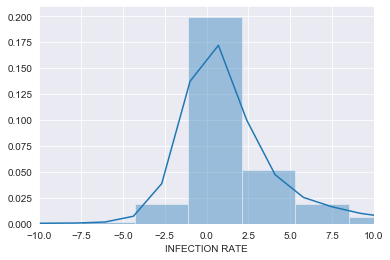

In [76]:
sns.distplot(val_diff)
plt.xlim(-10,10)

## 4/ Classification 

In [20]:
dtrain

,GEO_ID,COUNTY,STATE,POPULATION,AGE15_19,AGE20_24,AGE25_29,AGE30_34,AGE55_59,AGE60_64,...,UNEMP_65-74,UNEMP_OVER75,PERCENT WITH PRIVATE HEALTH INSURANCE,PERCENT NO PRIVATE HEALTH INSURANCE,PERCENT WITH PUBLIC HEALTH INSURANCE,PERCENT NO PUBLIC HEALTH INSURANCE,PERCENT MISSING HEALTH,LAND AREA(SQMI),INFECTION RATE,POP DENSITY
0,0500000US01001,Autauga County,Alabama,55200.0,7.0,6.0,6.6,6.2,7.5,4.9,...,1.5,0.0,64.150362,34.150362,37.731884,60.568841,26.865672,598.73,0.034420,92.195146
1,0500000US01003,Baldwin County,Alabama,208107.0,6.1,5.2,5.7,5.5,6.9,7.1,...,3.2,2.6,72.480022,28.537243,35.510098,65.507167,26.865672,1737.68,0.031714,119.761406
2,0500000US01005,Barbour County,Alabama,25782.0,5.6,6.4,7.2,7.0,6.4,6.4,...,3.0,9.2,40.745481,45.857575,49.169964,37.433093,26.865672,891.30,0.034908,28.926287
3,0500000US01007,Bibb County,Alabama,22527.0,6.7,6.6,6.9,6.7,6.6,5.4,...,4.5,0.0,55.440139,35.495184,39.836640,51.098682,26.865672,624.10,0.057709,36.095177
4,0500000US01009,Blount County,Alabama,57645.0,6.4,5.5,5.9,5.9,6.8,6.3,...,2.4,0.0,66.657993,33.015873,36.308440,63.365426,26.865672,646.77,0.020817,89.127511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,0500000US56035,Sublette County,Wyoming,9951.0,6.6,3.4,4.7,6.0,7.3,6.8,...,0.0,0.0,73.540479,45.684151,64.640821,54.583808,56.521739,4898.98,0.010049,2.031239
3142,0500000US56037,Sweetwater County,Wyoming,44117.0,7.2,6.2,7.1,7.7,7.0,6.1,...,3.3,0.0,67.901263,30.160709,21.155110,76.906861,56.521739,10435.46,0.015867,4.227605
3143,0500000US56039,Teton County,Wyoming,23059.0,4.0,4.8,9.3,9.1,6.4,6.6,...,5.9,0.0,80.935860,20.451884,20.104948,81.282796,56.521739,4077.70,0.229845,5.654903
3144,0500000US56041,Uinta County,Wyoming,20609.0,7.2,5.5,5.4,6.5,8.5,5.7,...,10.6,15.2,78.752002,19.840846,24.688243,73.904605,56.521739,2084.15,0.019409,9.888444


In [21]:
dtrain['RISK LEVEL'] = 0 
high_risk_list = dtrain[dtrain['INFECTION RATE'] >= 0.034]['GEO_ID']

In [22]:
len(high_risk_list)

1334

In [23]:
dtrain.loc[dtrain.GEO_ID.isin(high_risk_list), 'RISK LEVEL'] =  1

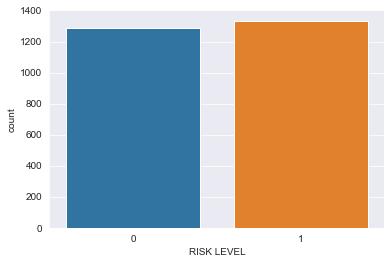

In [24]:
sns.countplot(dtrain['RISK LEVEL'])

In [25]:
cols = dtrain.columns.tolist()
xcols = [i for i in cols if i not in ['POPULATION','GEO_ID','COUNTY','STATE','INFECTION RATE','RISK LEVEL']]
len(xcols)

97

In [511]:
y = dtrain['RISK LEVEL']
X = dtrain[xcols]

In [512]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

In [297]:
def visualize_catfeat(feature,y,data):
    """
    Visualize the relationship between X and y using box plots
    """
    # Descending order of levels sorted by median SalePrice
    featOrder = data.groupby(
        [feature])[y].median().sort_values(ascending=False).index

    # Create box plot
    plt.figure(figsize=(15,10))
    sns.boxplot(x=feature,
                y=y,
                data=data,
                order=featOrder,
                palette='GnBu_r')

    plt.tight_layout()
    plt.title(y + ' BY ' +feature, fontsize = 18)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel(y, fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    if y == 'INFECTION RATE':
        plt.ylim(0,1)
    else:
        plt.ylim(min(data[y]), max(data[y])+1)

In [298]:
max(dtrain['INFECTION RATE'])

1.0

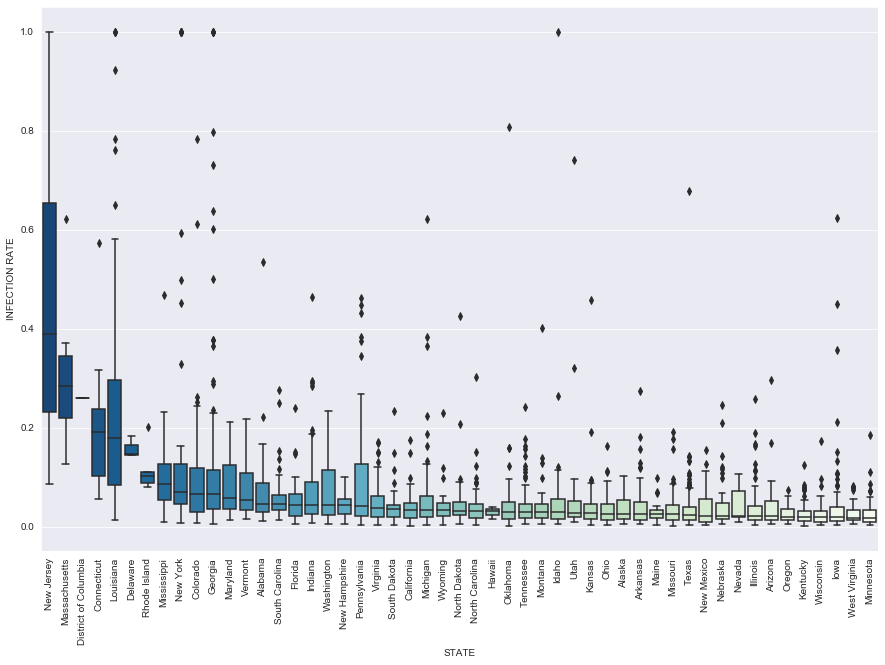

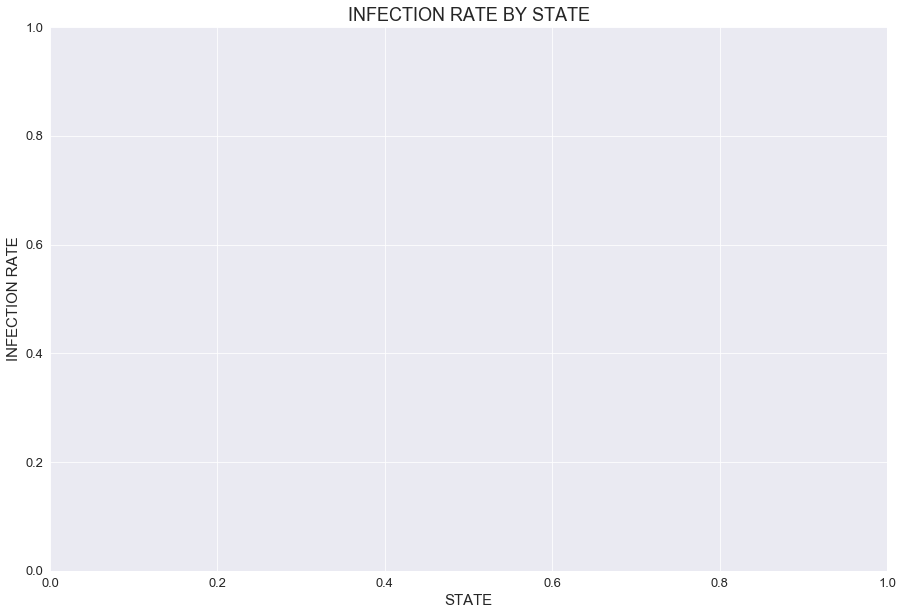

In [300]:
visualize_catfeat('STATE','INFECTION RATE',dtrain)

In [292]:
corr = dtrain.corr()
col_list = corr[corr['INFECTION RATE']>=0.2]['INFECTION RATE'].index
col_list

Index(['PUBLIC TRANSPORTATION (EXCLUDING TAXICAB)',
       'GRADUATE OR PROFESSIONAL DEGREE', '$65,000 TO $74,999',
       '$75,000 OR MORE', 'INFECTION RATE', 'RISK LEVEL'],
      dtype='object')

In [60]:
dtrain['POP DENSITY']

0        92.195146
1       119.761406
2        28.926287
3        36.095177
4        89.127511
           ...    
3141      2.031239
3142      4.227605
3143      5.654903
3144      9.888444
3145      3.627107
Name: POP DENSITY, Length: 2618, dtype: float64

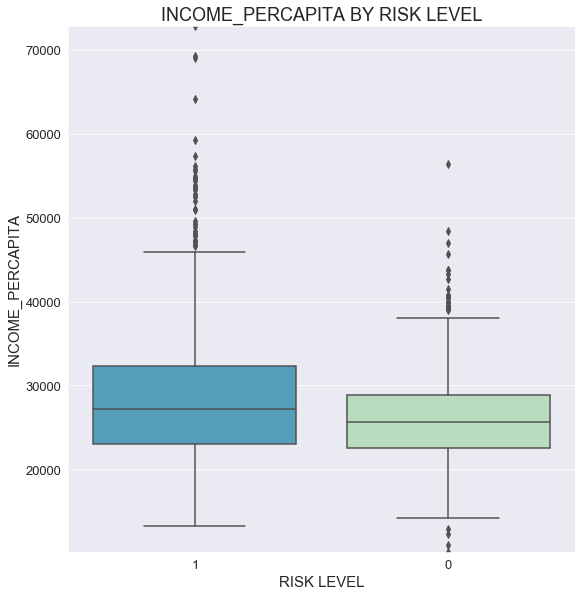

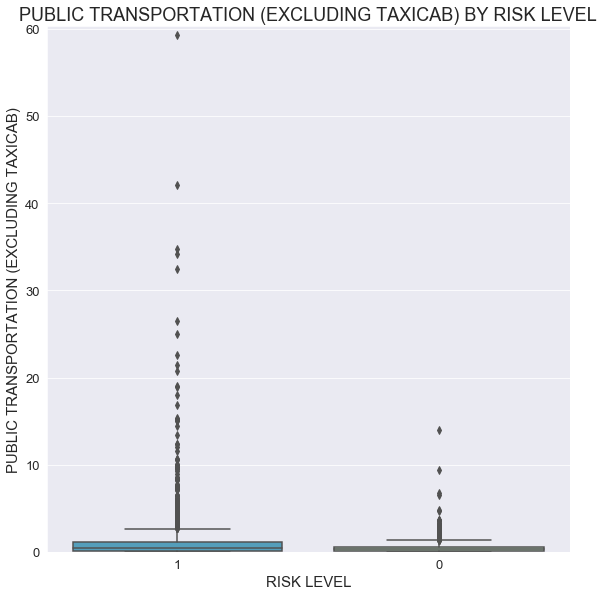

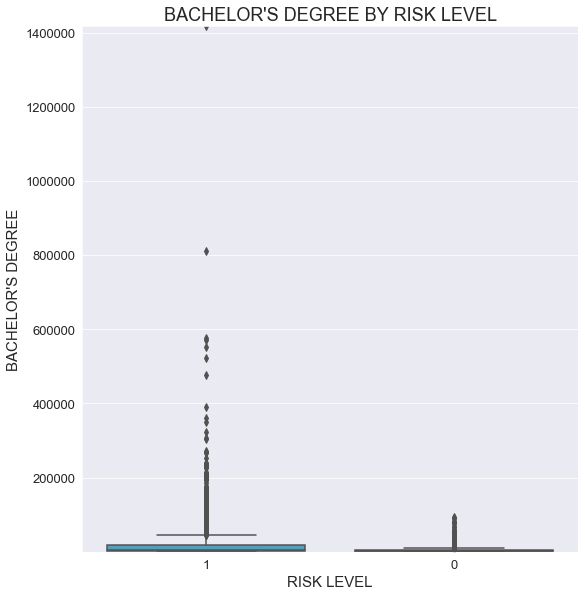

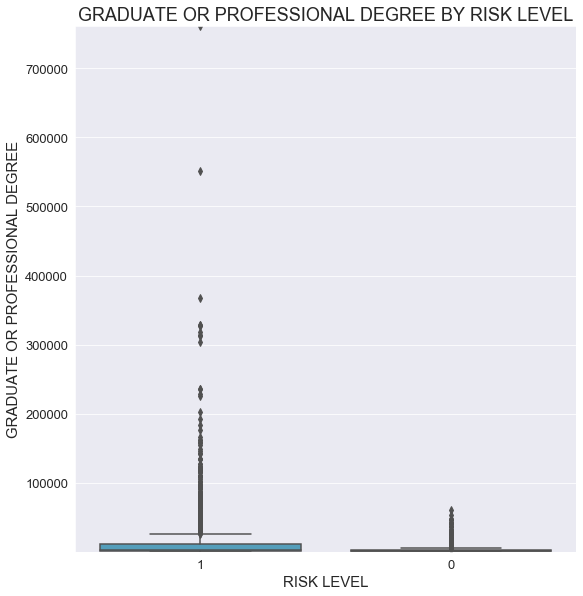

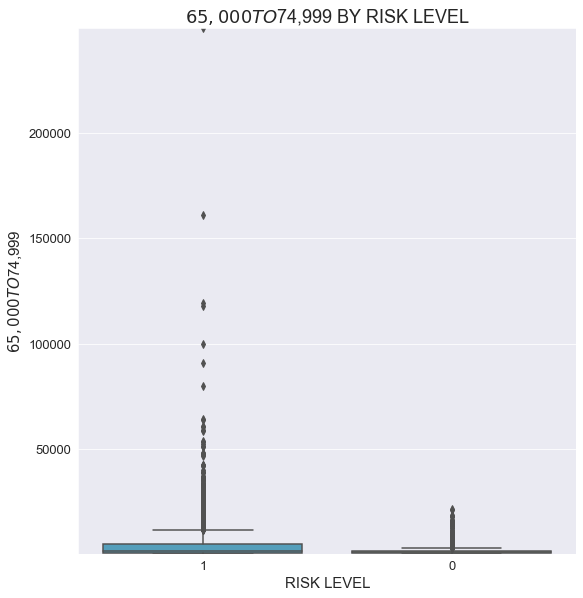

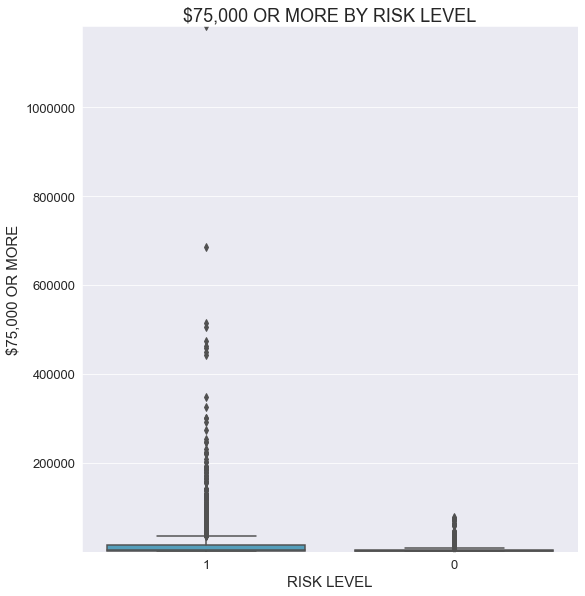

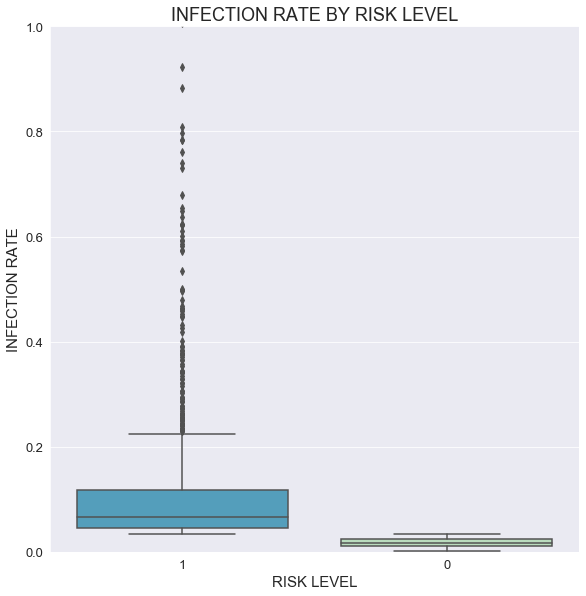

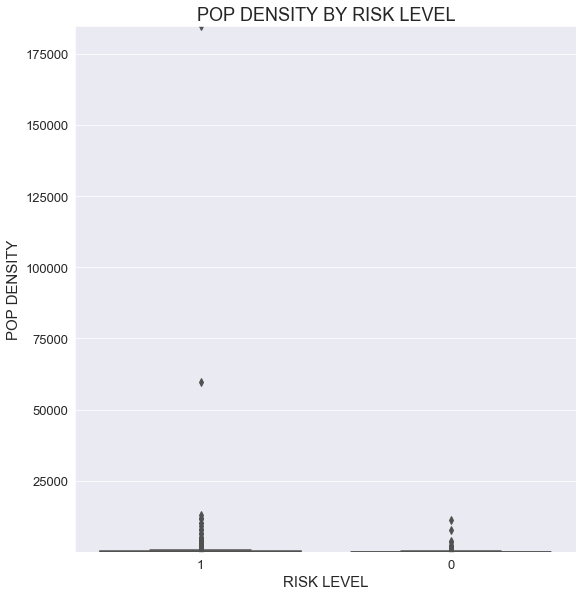

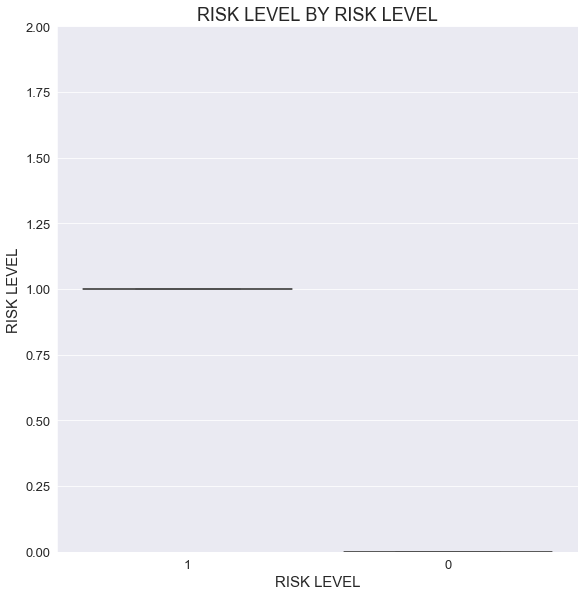

In [62]:
for i in col_list:
    visualize_catfeat('RISK LEVEL',i,dtrain)

## 4.2/ Modelling

In [382]:
tf.keras.backend.clear_session()

In [385]:
model1 = Sequential()

# The Input Layer :
model1.add(Dense(40, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
# The Hidden Layers :
model1.add(Dense(100, kernel_initializer='normal',activation='relu'))
# model1.add(Dense(100, kernel_initializer='normal',activation='relu'))
# model1.add(Dense(100, kernel_initializer='normal',activation='relu'))
# The Output Layer :
model1.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
# Compile the network :
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.AUC()]) #tf.keras.metrics.Recall()
model1.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40)                3920      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               4100      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 8,121
Trainable params: 8,121
Non-trainable params: 0
_________________________________________________________________


In [386]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [387]:
model1.fit(X_train, y_train, epochs=200, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)

Train on 1256 samples, validate on 314 samples
Epoch 1/200
1256/1256 [==============================] - 0s 135us/step - loss: 66.6385 - auc: 0.5423 - val_loss: 32.8113 - val_auc: 0.5447

Epoch 00001: val_loss improved from inf to 32.81126, saving model to Weights-001--32.81126.hdf5
Epoch 2/200
1256/1256 [==============================] - 0s 23us/step - loss: 26.5825 - auc: 0.5499 - val_loss: 8.3657 - val_auc: 0.5551

Epoch 00002: val_loss improved from 32.81126 to 8.36575, saving model to Weights-002--8.36575.hdf5
Epoch 3/200
1256/1256 [==============================] - 0s 23us/step - loss: 11.3435 - auc: 0.5535 - val_loss: 6.7478 - val_auc: 0.5551

Epoch 00003: val_loss improved from 8.36575 to 6.74780, saving model to Weights-003--6.74780.hdf5
Epoch 4/200
1256/1256 [==============================] - 0s 22us/step - loss: 6.3428 - auc: 0.5571 - val_loss: 3.8342 - val_auc: 0.5602

Epoch 00004: val_loss improved from 6.74780 to 3.83420, saving model to Weights-004--3.83420.hdf5
Epoch 5/2

1256/1256 [==============================] - 0s 21us/step - loss: 0.7175 - auc: 0.6424 - val_loss: 0.9860 - val_auc: 0.6427

Epoch 00084: val_loss did not improve from 0.75101
Epoch 85/200
1256/1256 [==============================] - 0s 25us/step - loss: 0.7023 - auc: 0.6430 - val_loss: 0.8423 - val_auc: 0.6433

Epoch 00085: val_loss did not improve from 0.75101
Epoch 86/200
1256/1256 [==============================] - 0s 23us/step - loss: 0.6585 - auc: 0.6437 - val_loss: 1.3455 - val_auc: 0.6438

Epoch 00086: val_loss did not improve from 0.75101
Epoch 87/200
1256/1256 [==============================] - 0s 20us/step - loss: 1.1167 - auc: 0.6438 - val_loss: 0.9154 - val_auc: 0.6438

Epoch 00087: val_loss did not improve from 0.75101
Epoch 88/200
1256/1256 [==============================] - 0s 19us/step - loss: 0.7581 - auc: 0.6438 - val_loss: 0.7886 - val_auc: 0.6441

Epoch 00088: val_loss did not improve from 0.75101
Epoch 89/200
1256/1256 [==============================] - 0s 20us/st

1256/1256 [==============================] - 0s 21us/step - loss: 1.0084 - auc: 0.6601 - val_loss: 0.9589 - val_auc: 0.6602

Epoch 00126: val_loss did not improve from 0.68463
Epoch 127/200
1256/1256 [==============================] - 0s 18us/step - loss: 1.0178 - auc: 0.6601 - val_loss: 0.7946 - val_auc: 0.6600

Epoch 00127: val_loss did not improve from 0.68463
Epoch 128/200
1256/1256 [==============================] - 0s 21us/step - loss: 0.7946 - auc: 0.6601 - val_loss: 0.6918 - val_auc: 0.6602

Epoch 00128: val_loss did not improve from 0.68463
Epoch 129/200
1256/1256 [==============================] - 0s 20us/step - loss: 0.6846 - auc: 0.6603 - val_loss: 0.6692 - val_auc: 0.6604

Epoch 00129: val_loss improved from 0.68463 to 0.66918, saving model to Weights-129--0.66918.hdf5
Epoch 130/200
1256/1256 [==============================] - 0s 20us/step - loss: 0.6673 - auc: 0.6605 - val_loss: 0.8396 - val_auc: 0.6605

Epoch 00130: val_loss did not improve from 0.66918
Epoch 131/200
125

In [388]:
weights_file = 'Weights-141--0.65287.hdf5' # choose the best checkpoint 
model1.load_weights(weights_file) # load it
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.AUC()])

In [395]:
y_pred = model1.predict(X_test)
roc_auc_score(y_test,y_pred)

0.6799680795242538

In [396]:
y_pred

array([[0.61564755],
       [0.25765195],
       [0.50488704],
       ...,
       [0.5253699 ],
       [0.43257922],
       [0.4301679 ]], dtype=float32)

In [401]:
import pickle
from sklearn.metrics import recall_score

In [405]:
y_pred_l = [1 if i>= 0.5 else 0 for i in y_pred]

recall_score(y_test, y_pred_l)

0.5279850746268657

In [398]:
pickle.dump(y_pred,open("y_pred_nn.pkl","wb"))

## 5/ AUC of all models

In [473]:
import pickle
import pandas as pd
import numpy as np

from sklearn.preprocessing import label_binarize
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import warnings

import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [485]:
y_pred_logreg = pd.read_csv('y_pred_lr.csv',index_col = 0)
y_pred_lr = y_pred_logreg['0'].to_numpy()

In [487]:
y_pred_gboost = pd.read_csv('gBoosting_y_proba.csv',index_col = 0)
y_pred_gb = y_pred_gboost['0'].to_numpy()

In [496]:
y_pred_nn = pickle.load(open("y_pred_nn.pkl", "rb" )).reshape(-1)
y_pred_pct = pickle.load(open("perceptron_pred_proba.pkl", "rb" ))
y_pred_svm = pickle.load(open("svm_pred_proba.pkl", "rb" ))

In [521]:
roc_auc_score(y_true,y_pred_svm ), roc_auc_score(y_true,y_pred_gb )

(0.7432733791977612, 0.742890770755597)

In [499]:
y_pred_pct

array([0.50107673, 0.48452863, 0.53922081, ..., 0.46152679, 0.41972062,
       0.45369716])

In [519]:
y_true = y_test

In [500]:
y_proba = [y_pred_lr,y_pred_svm,y_pred_pct,y_pred_gb,y_pred_nn]
name = ['Logistic Regression', 'Support Vector Machine','Perceptron',' Gradient Boosting', 'Neural Network']
recall = [
0.669,
0.656,
0.590,
0.637,
0.528]

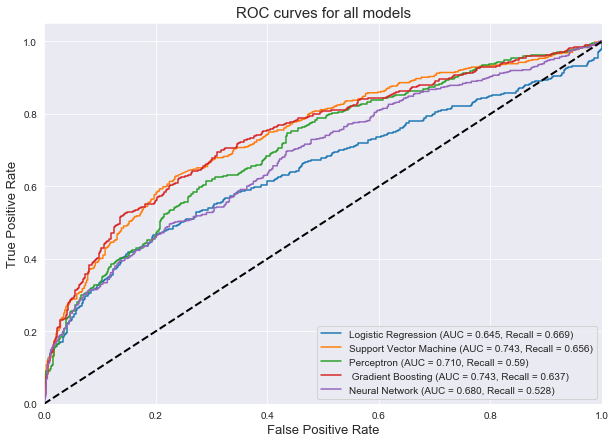

In [518]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10,7))
for i in range(len(y_proba)):    
    fpr[i], tpr[i], _ = roc_curve(y_true, y_proba[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(len(y_proba)):
    la = name[i] + ' (AUC = {:0.3f}, Recall = {})'.format(roc_auc[i], recall[i])
    plt.plot(fpr[i], tpr[i],label=la)
    
lw=2

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=13)
plt.title('ROC curves for all models',fontsize=15)
plt.legend(loc="lower right")
plt.savefig('AUC.png')
plt.show()
